# Demo of Spurious Correlation

By Yaohang Li

This demo is designed to show how spurious correlation can be found in data analysis. The demo attempts to find correlation between two sets of independent random variables, which there should be no causal correlations at all. However, data analysis technique, if not understood correctly, can lead to "discovery" of spurious correlation.

N should be change from 50 to 5000 to demonstrate the effect.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [2]:
np.random.seed(4)

### X and y are both independent random variables, where there should be no causal correlations.

In [3]:
N = 50
y = np.random.rand(100, 1)
X = np.random.rand(100, N)

In [4]:
lm = linear_model.LinearRegression()

In [5]:
# model = lm.fit(X,y)

In [6]:
# lm.score(X,y)

### Let's do some feature selection and find the 10 most correlated variables to y

In [7]:
df = pd.DataFrame(np.concatenate([X, y], axis=1))

In [8]:
# plt.figure(figsize=(28,22))
cor = df.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [9]:
#Correlation with output variable
cor_target = abs(cor[N])

In [10]:
index = cor_target.argsort()[-11:][::-1]

In [11]:
index = index[1:]

In [12]:
XX = X[:, index]

### Results

In [13]:
model = lm.fit(XX,y)

In [14]:
lm.score(XX,y)

0.40571937552885806

In [15]:
results = lm.predict(XX)

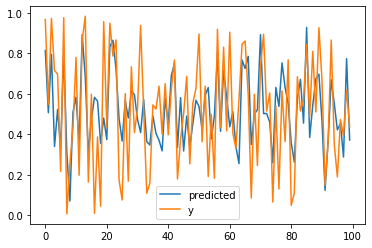

In [16]:
plt.plot(results, label="predicted")
plt.plot(y, label="y")
plt.legend()
plt.show()